# WeatherPy
----
Wide Scatter in data is observed.
R-square values are very low
Correlation coefficients are very low
Negative correlation observed.
There is lot of data scatter which resulted in Horizontal, & Vertical lines of data observed.
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
lats_ = []
lngs_ = []
cities = []
countries_ = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_ = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lats_.append(lat_lng[0])
        lngs_.append(lat_lng[1])
        countries_.append(city_.country_code)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temp = []
humi = []
cloud = []
wind = []
conf_cities = []
lats = []
lngs = []
countries = []


for city in cities:
    x = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}")
    if x.status_code == 429:
        print ('timeout')
        time.sleep(61)
        x = (requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"))


    try:
        temp.append(x.json()['main']['temp'])
        humi.append(x.json()['main']['humidity'])
        cloud.append(x.json()['clouds']['all'])
        wind.append(x.json()['wind']['speed'])

        lats.append(lats_.pop(0))
        lngs.append(lngs_.pop(0))
        conf_cities.append(city)
        countries.append(countries_.pop(0))

        print (f'fetched for {city}')
    except:
        print (f'Failed for {city}')
        lats_.pop(0)
        lngs_.pop(0)
        countries_.pop(0)



fetched for yellowknife
fetched for nchelenge
Failed for taolanaro
fetched for talnakh
Failed for samusu
fetched for hermanus
fetched for kirakira
fetched for kirensk
fetched for clyde river
fetched for albany
fetched for carnarvon
fetched for souillac
fetched for sitka
Failed for mys shmidta
fetched for sibolga
fetched for klaksvik
fetched for lebu
fetched for rio grande
fetched for tasiilaq
fetched for cape town
fetched for punta arenas
fetched for ushuaia
Failed for belushya guba
fetched for rikitea
fetched for cherskiy
fetched for san patricio
Failed for vastervik
fetched for acarau
fetched for katherine
fetched for airai
fetched for henties bay
fetched for lata
fetched for mugur-aksy
fetched for avarua
fetched for jamestown
fetched for mar del plata
fetched for sao filipe
Failed for illoqqortoormiut
fetched for luderitz
fetched for lazaro cardenas
fetched for pangnirtung
fetched for vaini
fetched for slantsy
fetched for fort nelson
fetched for voyvozh
fetched for nowy dwor gdanski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
import pandas as pd

dataframe = pd.DataFrame(columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country'])

dataframe['City'] = conf_cities
dataframe['Lat'] = lngs
dataframe['Lng'] = lats
dataframe['Max Temp'] = temp
dataframe['Humidity'] = humi
dataframe['Cloudiness'] = cloud
dataframe['Wind Speed'] = wind
dataframe['Country'] = countries

In [5]:
dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,yellowknife,-103.022169,73.339608,285.11,66,20,6.20,ca
1,nchelenge,28.353179,-9.650344,297.00,45,1,1.77,zm
2,talnakh,92.427932,76.474652,283.15,46,40,5.00,ru
3,hermanus,-6.738438,-78.812391,292.59,53,0,1.52,za
4,kirakira,162.787843,-11.867814,299.56,84,16,3.79,sb


In [6]:
dataframe.to_csv('cities_csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#One Line of code - use .describe()
dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,19.012888,19.704385,293.766545,66.607330,50.101222,3.671902
std,92.598248,37.098615,8.554942,22.084099,37.629174,2.468732
min,-179.901532,-83.302150,273.150000,1.000000,0.000000,0.180000
25%,-62.128904,-9.182096,287.090000,53.000000,10.000000,1.830000
50%,25.360763,23.657637,295.110000,70.000000,51.000000,3.100000
75%,97.628223,50.414581,299.800000,83.000000,87.000000,5.060000
max,179.750554,89.317043,319.270000,100.000000,100.000000,15.400000


In [8]:
# Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
def plot_scatter(x, y, name):
    plt.scatter(x, y)
    plt.title(name[0])
    plt.xlabel(name[1])
    plt.ylabel(name[2])
    plt.show()

## Latitude vs. Temperature Plot

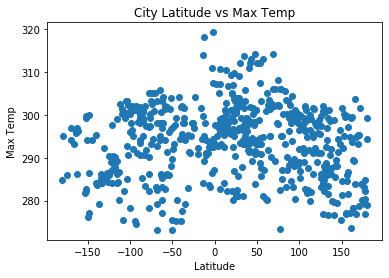

In [12]:
plot_scatter(dataframe['Lat'], dataframe['Max Temp'], ['City Latitude vs Max Temp', 'Latitude', 'Max Temp'])

## Latitude vs. Humidity Plot

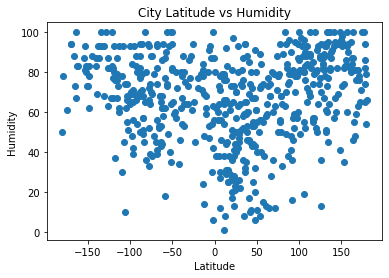

In [13]:
plot_scatter(dataframe['Lat'], dataframe['Humidity'], ['City Latitude vs Humidity', 'Latitude', 'Humidity'])

## Latitude vs. Cloudiness Plot

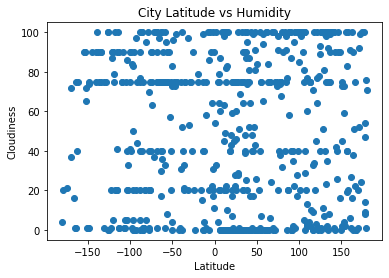

In [14]:
plot_scatter(dataframe['Lat'], dataframe['Cloudiness'], ['City Latitude vs Humidity', 'Latitude', 'Cloudiness'])


## Latitude vs. Wind Speed Plot

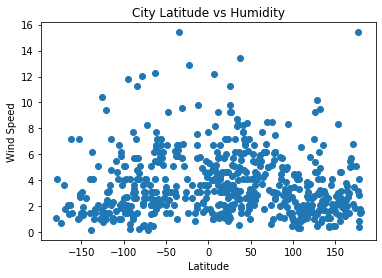

In [15]:
plot_scatter(dataframe['Lat'], dataframe['Wind Speed'], ['City Latitude vs Humidity', 'Latitude', 'Wind Speed'])

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linreg(x, y, name):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print (f'The r-squared is: {r_value}')
    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.legend()
    plt.title(name[0])
    plt.xlabel(name[1])
    plt.ylabel(name[2])
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
dataframe.head()

nh = dataframe[dataframe.Lng > 0]
sh = dataframe[dataframe.Lng < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.026336662754312797


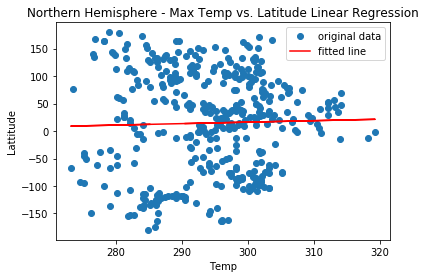

In [18]:
plot_linreg(nh['Max Temp'],nh['Lat'], ['Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Temp', 'Lattitude'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.18386133069660876


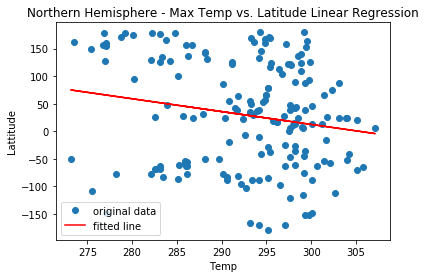

In [19]:
plot_linreg(sh['Max Temp'],sh['Lat'], ['Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Temp', 'Lattitude'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.013719973437638894


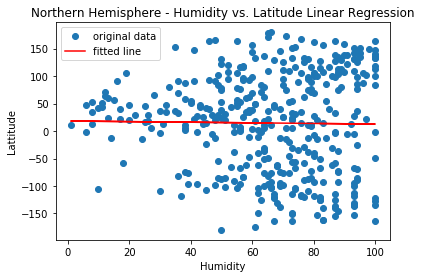

In [20]:
plot_linreg(nh['Humidity'],nh['Lat'], ['Northern Hemisphere - Humidity vs. Latitude Linear Regression', 'Humidity', 'Lattitude'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1457491477699197


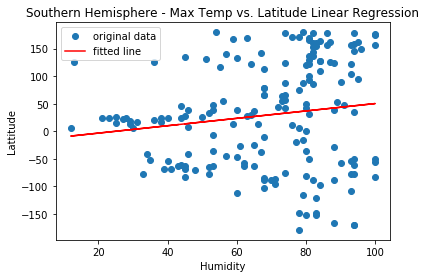

In [21]:
plot_linreg(sh['Humidity'],sh['Lat'], ['Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Humidity', 'Lattitude'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0610663611873865


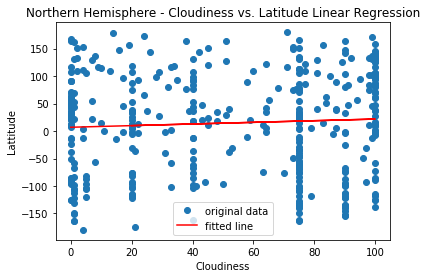

In [22]:
plot_linreg(nh['Cloudiness'],nh['Lat'], ['Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Cloudiness', 'Lattitude'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.11171989780644513


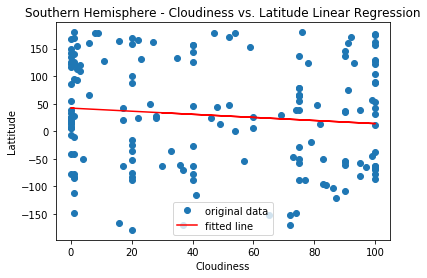

In [23]:
plot_linreg(sh['Cloudiness'],sh['Lat'], ['Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Cloudiness', 'Lattitude'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.059219713227591154


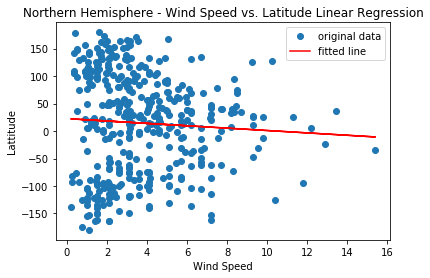

In [24]:
plot_linreg(nh['Wind Speed'],nh['Lat'], ['Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Wind Speed', 'Lattitude'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0013861679355645692


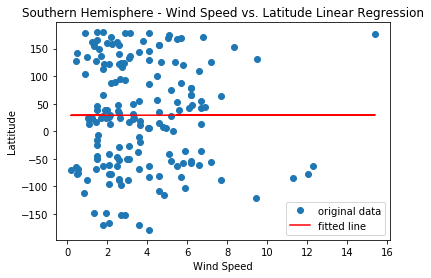

In [25]:
plot_linreg(sh['Wind Speed'],sh['Lat'], ['Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Wind Speed', 'Lattitude'])